# Aula de Regressão linear

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [6]:
%matplotlib notebook


## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [7]:
#criando valores aleatorios de m2 e preços
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

<IPython.core.display.Javascript object>


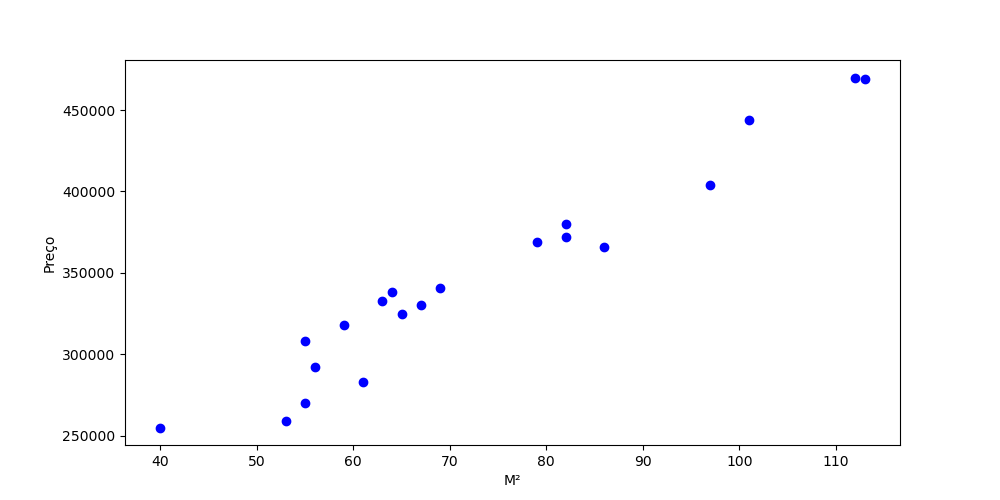

Text(0, 0.5, 'Preço')

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [9]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [10]:
#acrescentamos linha de 1s para transformar o vetor em matriz e poder usar multiplicação de matrizes
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1.,  63.],
       [  1.,  65.],
       [  1.,  64.],
       [  1.,  82.],
       [  1.,  59.],
       [  1., 112.],
       [  1.,  53.],
       [  1.,  69.],
       [  1.,  40.],
       [  1.,  97.],
       [  1.,  56.],
       [  1.,  67.],
       [  1.,  82.],
       [  1.,  61.],
       [  1.,  55.],
       [  1.,  79.],
       [  1., 101.],
       [  1.,  86.],
       [  1., 113.],
       [  1.,  55.]])

In [11]:
X_b.T.dot(X_b) # x matriz transposta vezes a matriz x não transposta

array([[2.00000e+01, 1.45900e+03],
       [1.45900e+03, 1.14345e+05]])

In [12]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
#chagamos a um vetor [b,alpha]

array([[123351.55069871],
       [  3056.18162168]])

## Ajustando a reta

In [13]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]
#ỹ = predict(alpha=alpha, beta=beta, X=X) gerando reta de minimos quadrados 

In [14]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [15]:
ỹ

array([[315890.99286432],
       [322003.35610767],
       [318947.174486  ],
       [373958.44367617],
       [303666.26637761],
       [465643.89232646],
       [285329.17664756],
       [334228.08259438],
       [245598.81556576],
       [419801.16800131],
       [294497.72151259],
       [328115.71935102],
       [373958.44367617],
       [309778.62962097],
       [291441.53989091],
       [364789.89881114],
       [432025.89448802],
       [386183.17016287],
       [468700.07394813],
       [291441.53989091]])

## Plotando os Dados

<IPython.core.display.Javascript object>


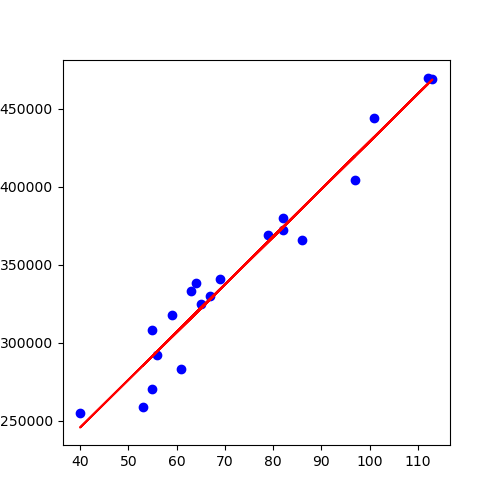

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [17]:
from sklearn.linear_model import LinearRegression # sklearn regressão linear

<IPython.core.display.Javascript object>


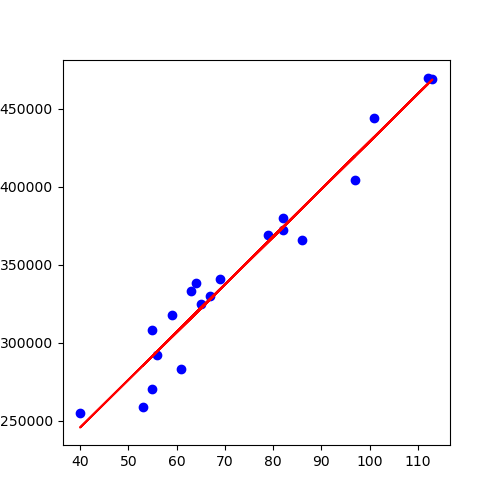

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r') #plot com metodo feito a mão

In [19]:
lr = LinearRegression() #instancia objeto de regressão

In [20]:
lr.fit(X, y) #treina modelo com os dados

LinearRegression()

In [21]:
ỹ = lr.predict(X) #usamos mesmo dados de X para ver gerar mesmo y só que pedicto

<IPython.core.display.Javascript object>


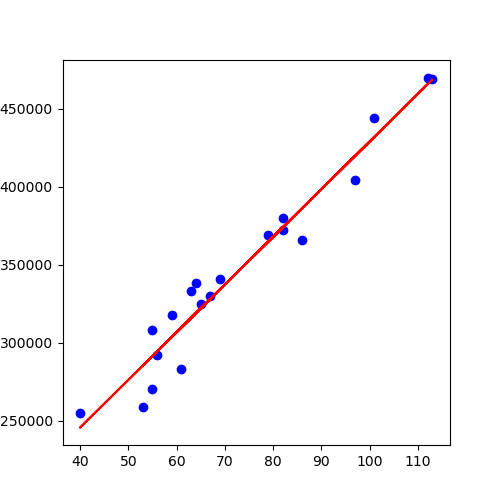

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [23]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.95


## Avaliando meu modelo de regressão

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 11498.984951238474
MSE: 201799003.91229862
RMSE: 14205.597626016957
